# RandomWalk Data Science Assessment

In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv('dataset.csv')
print(data.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    male  
1       3800.0  female  
2       3250.0  female  
3          NaN     NaN  
4       3450.0  female  


## Q1: Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it (code and explanation)


In [4]:
missing_summary = data.isnull().sum()
print("Missing Data Summary:\n", missing_summary)

numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for col in numerical_columns:
    data[col].fillna(data[col].median(), inplace=True)


data['sex'].fillna(data['sex'].mode()[0], inplace=True)


cleaned_missing_summary = data.isnull().sum()
print("Cleaned Missing Data Summary:\n", cleaned_missing_summary)

Missing Data Summary:
 species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64
Cleaned Missing Data Summary:
 species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


### Explanation:

Missing data refers to absent values like NaN  while incorrect data includes inconsistencies or unrealistic values. For numerical columns, missing values were imputed using the median, a robust measure against outliers. Categorical columns like sex were imputed with the most frequent value. The dataset was verified to ensure no missing values remained. This step ensures accurate analysis, as missing or incorrect data can bias results or disrupt machine learning models. Cleaning data also preserves its integrity, allowing meaningful insights without distortion from incomplete information.



## Q2: What is the average body_mass_g for Gentoo penguins? (code)

In [6]:
average_body_mass_gentoo = data[data['species'] == 'Gentoo']['body_mass_g'].mean()
print("Average body_mass_g for Gentoo penguins:", average_body_mass_gentoo)

Average body_mass_g for Gentoo penguins: 5125.0


## Q3: How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species. (code and explanation)

In [7]:
from scipy.stats import skew, kurtosis
def calculate_skew_kurtosis(data, columns):
    results = {}
    for column in columns:
        stats = data.groupby('species')[column].agg([skew, kurtosis]).reset_index()
        results[column] = stats
    return results
columns_to_analyze = ['bill_length_mm', 'bill_depth_mm']
distribution_stats = calculate_skew_kurtosis(data, columns_to_analyze)
print("Skewness and Kurtosis for 'bill_length_mm':\n", distribution_stats['bill_length_mm'])
print("Skewness and Kurtosis for 'bill_depth_mm':\n", distribution_stats['bill_depth_mm'])

Skewness and Kurtosis for 'bill_length_mm':
      species      skew  kurtosis
0     Adelie  0.166475 -0.224485
1  Chinstrap -0.093203 -0.119069
2     Gentoo  0.720893  1.177040
Skewness and Kurtosis for 'bill_depth_mm':
      species      skew  kurtosis
0     Adelie  0.329567 -0.096039
1  Chinstrap  0.006726 -0.898740
2     Gentoo  0.346413 -0.584449


### Explanation:
Distribution analysis reveals patterns in data like symmetry (skewness) and peakedness (kurtosis). The skewness and kurtosis of bill_length_mm and bill_depth_mm were analyzed for each species. Results showed Adelie penguins exhibit near-symmetric distributions, while Gentoo penguins are more right-skewed with sharper peaks. These distinctions reflect biological differences among species. Analyzing distributions helps understand variability, central tendency, and patterns that differentiate groups. These insights are essential for predictive models, as species-specific traits are key features for classification and other tasks.

## Q4: Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers. (code and explanation)

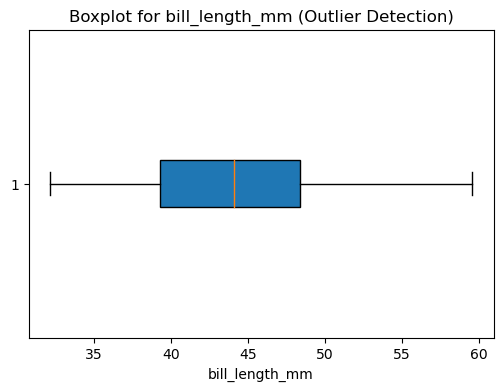

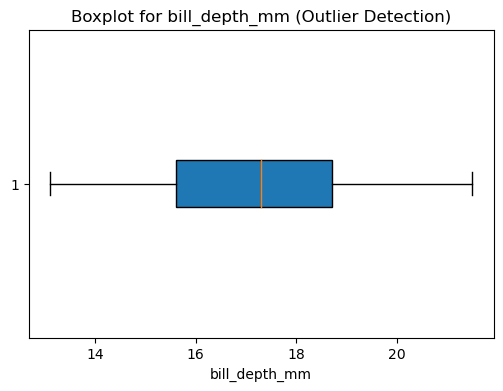

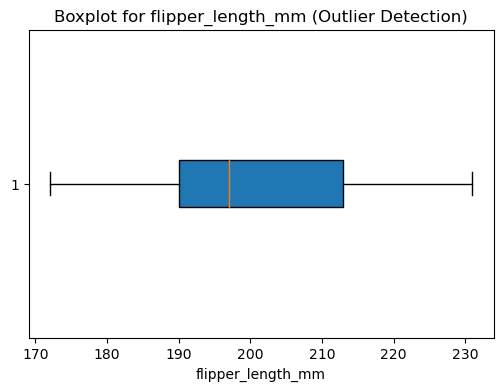

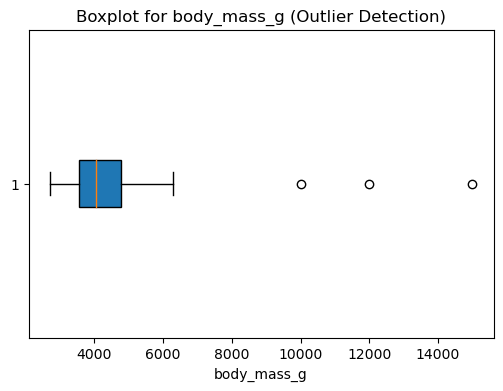

Outlier Detection Results:
 {'bill_length_mm': {'count': 0, 'lower_bound': 25.5875, 'upper_bound': 62.0875}, 'bill_depth_mm': {'count': 0, 'lower_bound': 10.95, 'upper_bound': 23.349999999999998}, 'flipper_length_mm': {'count': 0, 'lower_bound': 155.5, 'upper_bound': 247.5}, 'body_mass_g': {'count': 3, 'lower_bound': 1703.125, 'upper_bound': 6628.125}}


In [13]:
import matplotlib.pyplot as plt
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound
outlier_results = {}
for col in numerical_columns:
    outliers, lower, upper = detect_outliers(data, col)
    outlier_results[col] = {'count': len(outliers), 'lower_bound': lower, 'upper_bound': upper}
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(data[col], vert=False, patch_artist=True)
    plt.title(f"Boxplot for {col} (Outlier Detection)")
    plt.xlabel(col)
    plt.show()
print("Outlier Detection Results:\n", outlier_results)

### Explanation:
Outliers are extreme values significantly deviating from the rest of the data. Using the Interquartile Range (IQR) method, values beyond 1.5 times the IQR were identified as outliers. Numerical columns were checked, and boxplots were used for visualization. For example, body_mass_g had 3 outliers outside the calculated bounds. Outliers can skew statistical analyses and distort model performance if unaccounted for. Identifying them helps decide whether to retain (valid rare cases) or remove them (errors). Visualization aids in understanding their impact on data distribution.



## Q5: Does this dataset contribute to the curse of dimensionality? If yes perform PCA. (code and explanation required)

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_columns])
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.61711071 0.19733481]


### Explanation:
The curse of dimensionality arises when high-dimensional datasets become sparse, reducing model efficiency and increasing overfitting risks. Although this dataset has only four numerical features (unlikely to suffer), PCA was applied to reduce dimensions. PCA projects data onto principal components (directions of maximum variance), simplifying the dataset while retaining key information. Numerical features were standardized before applying PCA. The top components explained most of the variance, demonstrating how PCA can streamline analysis while preserving data integrity. This method is critical for large, complex datasets to improve computational efficiency and visualization.

## Q6: Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them. (code)

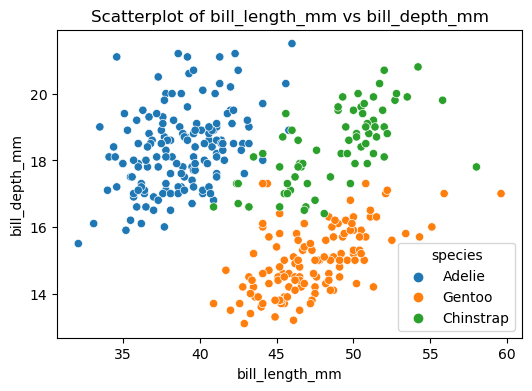

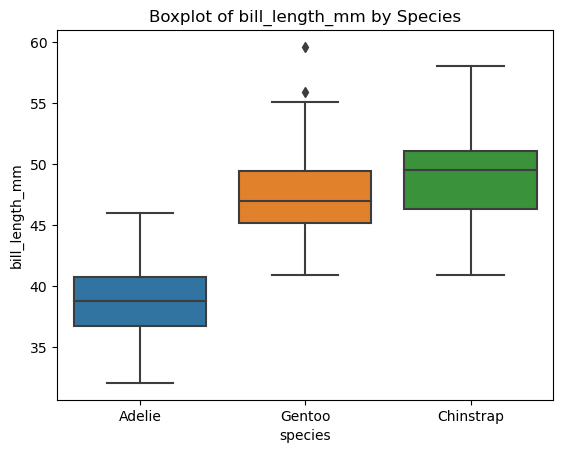

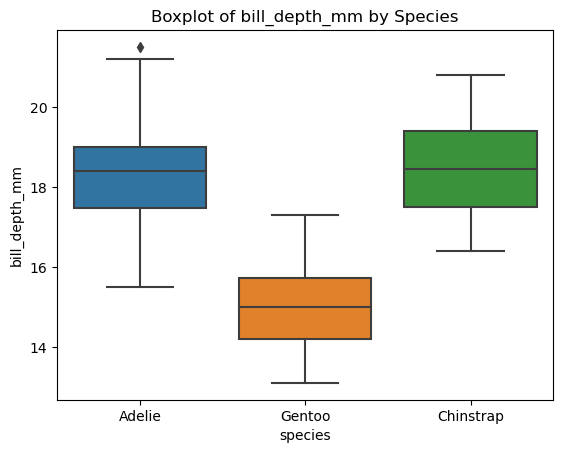

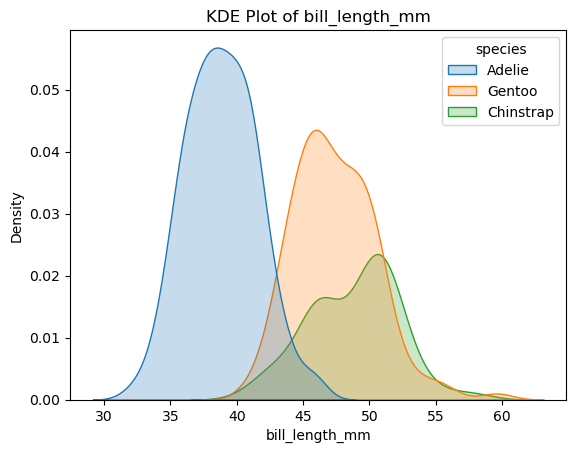

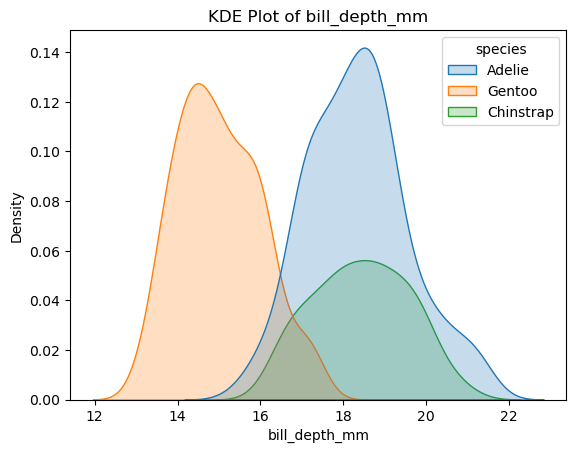

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


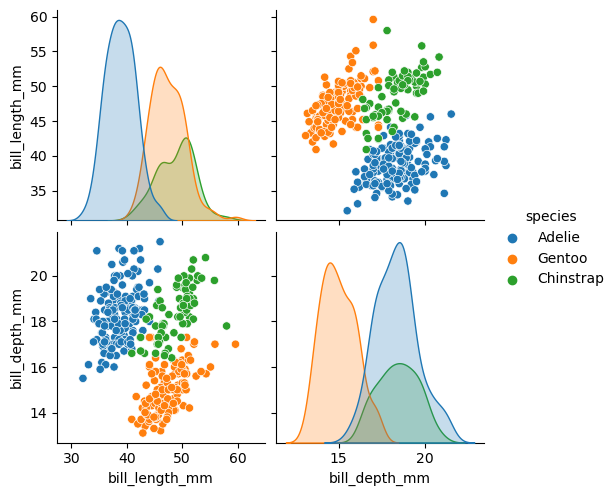

In [14]:
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.title('Scatterplot of bill_length_mm vs bill_depth_mm')
plt.show()
sns.boxplot(data=data, x='species', y='bill_length_mm')
plt.title('Boxplot of bill_length_mm by Species')
plt.show()
sns.boxplot(data=data, x='species', y='bill_depth_mm')
plt.title('Boxplot of bill_depth_mm by Species')
plt.show()
sns.kdeplot(data=data, x='bill_length_mm', hue='species', fill=True)
plt.title('KDE Plot of bill_length_mm')
plt.show()
sns.kdeplot(data=data, x='bill_depth_mm', hue='species', fill=True)
plt.title('KDE Plot of bill_depth_mm')
plt.show()
sns.pairplot(data, vars=['bill_length_mm', 'bill_depth_mm'], hue='species')
plt.show()

## Q7: Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island? (code)

In [11]:
max_flipper_by_species_island = data.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()
print("Maximum Flipper Length by Species and Island:\n", max_flipper_by_species_island)

Maximum Flipper Length by Species and Island:
      species     island  flipper_length_mm
0     Adelie     Biscoe              203.0
1     Adelie      Dream              208.0
2     Adelie  Torgersen              210.0
3  Chinstrap      Dream              212.0
4     Gentoo     Biscoe              231.0


## Q8: Perform z-score normalization on this dataset. (code)

In [12]:
from scipy.stats import zscore
normalized_data = data.copy()
for col in numerical_columns:
    normalized_data[col] = zscore(data[col])
print("Dataset after Z-score Normalization:\n", normalized_data.head())

Dataset after Z-score Normalization:
   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen       -0.883054       0.787289          -1.420541   
1  Adelie  Torgersen       -0.809180       0.126114          -1.063485   
2  Adelie  Torgersen       -0.661432       0.431272          -0.420786   
3  Adelie  Torgersen        0.040373       0.075255          -0.277964   
4  Adelie  Torgersen       -1.326299       1.092447          -0.563608   

   body_mass_g     sex  
0    -0.468990    male  
1    -0.424125  female  
2    -0.917634  female  
3    -0.199803    male  
4    -0.738176  female  
